## Review extraction code

In [1]:
'''

from autoscraper import AutoScraper

url2=[
    'https://www.amazon.in/Test-Exclusive_2020_1180-Multi-3GB-Storage/product-reviews/B089MT34QL/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=2',
    'https://www.amazon.in/Test-Exclusive_2020_1180-Multi-3GB-Storage/product-reviews/B089MT34QL/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=3',
    'https://www.amazon.in/Test-Exclusive_2020_1180-Multi-3GB-Storage/product-reviews/B089MT34QL/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=4',
    'https://www.amazon.in/Test-Exclusive_2020_1180-Multi-3GB-Storage/product-reviews/B089MT34QL/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=5'
]

want2=[
    'I have recieved this new phone yesterday. Since I have started using its been heating all the time, while on charge, playing games etc.. All other things are pretty good.',
    'Extremely worst battery.. battery drain s very quickly.. mobile also average camera',
    'Overheating during charging & app usage... delay in image opening in gallery after clicking photo by camera, need to hold camera in position after clicking photo as its response is late otherwise image will get distorted.',
    'This phone having lost of issue. Charge ing , camera, massage application was not open.phone heating issues. And tere are more problems are facing in this'
]

#Looping through the URL's and Reviews sample list
reviews=[]
for x in url2:
    y=0
    scraper = AutoScraper()
    result= scraper.build(x, want2[y])
    print(result)
    reviews.append(result)
    y=y+1

reviews


#Appending the nested list to new non-nested list
reviews_list=[]
for i in reviews:
    for j in i:
        reviews_list.append(j)
reviews_list

type(reviews_list)

len(reviews_list)

#Coverting list into dataframe

df=pd.Dataframe(reviews_list)

#Saving sataframe into csv

df.to_csv('Reviews.csv')

'''

"\n\nfrom autoscraper import AutoScraper\n\nurl2=[\n    'https://www.amazon.in/Test-Exclusive_2020_1180-Multi-3GB-Storage/product-reviews/B089MT34QL/ref=cm_cr_getr_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=2',\n    'https://www.amazon.in/Test-Exclusive_2020_1180-Multi-3GB-Storage/product-reviews/B089MT34QL/ref=cm_cr_getr_d_paging_btm_next_3?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=3',\n    'https://www.amazon.in/Test-Exclusive_2020_1180-Multi-3GB-Storage/product-reviews/B089MT34QL/ref=cm_cr_getr_d_paging_btm_next_4?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=4',\n    'https://www.amazon.in/Test-Exclusive_2020_1180-Multi-3GB-Storage/product-reviews/B089MT34QL/ref=cm_cr_getr_d_paging_btm_next_5?ie=UTF8&reviewerType=all_reviews&filterByStar=critical&pageNumber=5'\n]\n\nwant2=[\n    'I have recieved this new phone yesterday. Since I have started using its been heating all the time, while on charge, p

## Text Mining

In [2]:
#Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy

from matplotlib.pyplot import imread
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

In [3]:
df = pd.read_csv('Reviews.csv',index_col=0)
df.columns.values

array(['0'], dtype=object)

In [4]:
# df.drop(['Unnamed: 0'], axis=1, inplace=True)
df

,0
0,"IMDbMovies, TV& Celebrities"
1,"© 1996-2022, Amazon.com, Inc. or its affiliates"
2,3.0 out of 5 stars
3,1.0 out of 5 stars
4,"Style name: 8GB RAM, 128GB StorageColour: Lake..."
5,"Style name: 12GB RAM, 256GB StorageColour: Lak..."
6,"Style name: 8GB RAM, 128GB StorageColour: Carb..."
7,Top positive reviewAll positive reviews› Mohit...
8,Sort byTop reviewsMost recentTop reviews
9,Top positive reviewAll positive reviews› Mohit...


In [5]:
df.rename({0:'Reviews'}, axis=1, inplace=True)

In [6]:
df.shape

(22, 1)

In [7]:
df.columns =['Reviews']
df

,Reviews
0,"IMDbMovies, TV& Celebrities"
1,"© 1996-2022, Amazon.com, Inc. or its affiliates"
2,3.0 out of 5 stars
3,1.0 out of 5 stars
4,"Style name: 8GB RAM, 128GB StorageColour: Lake..."
5,"Style name: 12GB RAM, 256GB StorageColour: Lak..."
6,"Style name: 8GB RAM, 128GB StorageColour: Carb..."
7,Top positive reviewAll positive reviews› Mohit...
8,Sort byTop reviewsMost recentTop reviews
9,Top positive reviewAll positive reviews› Mohit...


#### Data Cleaning

In [8]:
df = [Reviews.strip() for Reviews in df['Reviews']]
df = [Reviews for Reviews in df if Reviews]


In [9]:
df

['IMDbMovies, TV& Celebrities',
 '© 1996-2022, Amazon.com, Inc. or its affiliates',
 '3.0 out of 5 stars',
 '1.0 out of 5 stars',
 'Style name: 8GB RAM, 128GB StorageColour: Lake Blue',
 'Style name: 12GB RAM, 256GB StorageColour: Lake Blue',
 'Style name: 8GB RAM, 128GB StorageColour: Carbon Black',
 'Top positive reviewAll positive reviews› Mohit MJ5.0 out of 5 starsAmazing - True FlagshipReviewed in India on 19 April 2021My first time buying a OnePlus phone and I really like the finish of the one. Camera is excellent, Android 11 is very smooth to use, functions are fast.Just my first day of usage so hard to be critical of anything. The downside for me is that there is no place expand the memory.---Updating my review after 100 days of using. Bought on April 19th updated review on July 29th.Super fast charging.. 30 mins and goes from say 30% battery to 100% battery charge.I also bought the OnePlus Buds Z along with the phone and these are great quality. Connecting the buds sometimes i

In [10]:
#Joining the list into one string/text

review_text = ' '.join(df)
review_text

'IMDbMovies, TV& Celebrities © 1996-2022, Amazon.com, Inc. or its affiliates 3.0 out of 5 stars 1.0 out of 5 stars Style name: 8GB RAM, 128GB StorageColour: Lake Blue Style name: 12GB RAM, 256GB StorageColour: Lake Blue Style name: 8GB RAM, 128GB StorageColour: Carbon Black Top positive reviewAll positive reviews› Mohit MJ5.0 out of 5 starsAmazing - True FlagshipReviewed in India on 19 April 2021My first time buying a OnePlus phone and I really like the finish of the one. Camera is excellent, Android 11 is very smooth to use, functions are fast.Just my first day of usage so hard to be critical of anything. The downside for me is that there is no place expand the memory.---Updating my review after 100 days of using. Bought on April 19th updated review on July 29th.Super fast charging.. 30 mins and goes from say 30% battery to 100% battery charge.I also bought the OnePlus Buds Z along with the phone and these are great quality. Connecting the buds sometimes is an issue. Sometimes it will

In [11]:
#Remove Punctios
no_punc_text = review_text.translate(str.maketrans('','',string.punctuation))
no_punc_text

'IMDbMovies TV Celebrities © 19962022 Amazoncom Inc or its affiliates 30 out of 5 stars 10 out of 5 stars Style name 8GB RAM 128GB StorageColour Lake Blue Style name 12GB RAM 256GB StorageColour Lake Blue Style name 8GB RAM 128GB StorageColour Carbon Black Top positive reviewAll positive reviews› Mohit MJ50 out of 5 starsAmazing  True FlagshipReviewed in India on 19 April 2021My first time buying a OnePlus phone and I really like the finish of the one Camera is excellent Android 11 is very smooth to use functions are fastJust my first day of usage so hard to be critical of anything The downside for me is that there is no place expand the memoryUpdating my review after 100 days of using Bought on April 19th updated review on July 29thSuper fast charging 30 mins and goes from say 30 battery to 100 battery chargeI also bought the OnePlus Buds Z along with the phone and these are great quality Connecting the buds sometimes is an issue Sometimes it will connect automatically and sometimes i

In [12]:
#Tokenization
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\siddh\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [13]:
from nltk import word_tokenize
text_tokens = word_tokenize(no_punc_text)
text_tokens

['IMDbMovies',
 'TV',
 'Celebrities',
 '©',
 '19962022',
 'Amazoncom',
 'Inc',
 'or',
 'its',
 'affiliates',
 '30',
 'out',
 'of',
 '5',
 'stars',
 '10',
 'out',
 'of',
 '5',
 'stars',
 'Style',
 'name',
 '8GB',
 'RAM',
 '128GB',
 'StorageColour',
 'Lake',
 'Blue',
 'Style',
 'name',
 '12GB',
 'RAM',
 '256GB',
 'StorageColour',
 'Lake',
 'Blue',
 'Style',
 'name',
 '8GB',
 'RAM',
 '128GB',
 'StorageColour',
 'Carbon',
 'Black',
 'Top',
 'positive',
 'reviewAll',
 'positive',
 'reviews›',
 'Mohit',
 'MJ50',
 'out',
 'of',
 '5',
 'starsAmazing',
 'True',
 'FlagshipReviewed',
 'in',
 'India',
 'on',
 '19',
 'April',
 '2021My',
 'first',
 'time',
 'buying',
 'a',
 'OnePlus',
 'phone',
 'and',
 'I',
 'really',
 'like',
 'the',
 'finish',
 'of',
 'the',
 'one',
 'Camera',
 'is',
 'excellent',
 'Android',
 '11',
 'is',
 'very',
 'smooth',
 'to',
 'use',
 'functions',
 'are',
 'fastJust',
 'my',
 'first',
 'day',
 'of',
 'usage',
 'so',
 'hard',
 'to',
 'be',
 'critical',
 'of',
 'anything',
 

In [14]:
len(text_tokens)

5117

In [15]:
lower_words =[comment.lower() for comment in text_tokens]
lower_words

['imdbmovies',
 'tv',
 'celebrities',
 '©',
 '19962022',
 'amazoncom',
 'inc',
 'or',
 'its',
 'affiliates',
 '30',
 'out',
 'of',
 '5',
 'stars',
 '10',
 'out',
 'of',
 '5',
 'stars',
 'style',
 'name',
 '8gb',
 'ram',
 '128gb',
 'storagecolour',
 'lake',
 'blue',
 'style',
 'name',
 '12gb',
 'ram',
 '256gb',
 'storagecolour',
 'lake',
 'blue',
 'style',
 'name',
 '8gb',
 'ram',
 '128gb',
 'storagecolour',
 'carbon',
 'black',
 'top',
 'positive',
 'reviewall',
 'positive',
 'reviews›',
 'mohit',
 'mj50',
 'out',
 'of',
 '5',
 'starsamazing',
 'true',
 'flagshipreviewed',
 'in',
 'india',
 'on',
 '19',
 'april',
 '2021my',
 'first',
 'time',
 'buying',
 'a',
 'oneplus',
 'phone',
 'and',
 'i',
 'really',
 'like',
 'the',
 'finish',
 'of',
 'the',
 'one',
 'camera',
 'is',
 'excellent',
 'android',
 '11',
 'is',
 'very',
 'smooth',
 'to',
 'use',
 'functions',
 'are',
 'fastjust',
 'my',
 'first',
 'day',
 'of',
 'usage',
 'so',
 'hard',
 'to',
 'be',
 'critical',
 'of',
 'anything',
 

In [16]:
#Remove stopwords
from nltk.corpus import stopwords
my_stop_words = stopwords.words('english')
my_stop_words

no_stop_tokens = [word for word in lower_words if word not in my_stop_words]
no_stop_tokens

['imdbmovies',
 'tv',
 'celebrities',
 '©',
 '19962022',
 'amazoncom',
 'inc',
 'affiliates',
 '30',
 '5',
 'stars',
 '10',
 '5',
 'stars',
 'style',
 'name',
 '8gb',
 'ram',
 '128gb',
 'storagecolour',
 'lake',
 'blue',
 'style',
 'name',
 '12gb',
 'ram',
 '256gb',
 'storagecolour',
 'lake',
 'blue',
 'style',
 'name',
 '8gb',
 'ram',
 '128gb',
 'storagecolour',
 'carbon',
 'black',
 'top',
 'positive',
 'reviewall',
 'positive',
 'reviews›',
 'mohit',
 'mj50',
 '5',
 'starsamazing',
 'true',
 'flagshipreviewed',
 'india',
 '19',
 'april',
 '2021my',
 'first',
 'time',
 'buying',
 'oneplus',
 'phone',
 'really',
 'like',
 'finish',
 'one',
 'camera',
 'excellent',
 'android',
 '11',
 'smooth',
 'use',
 'functions',
 'fastjust',
 'first',
 'day',
 'usage',
 'hard',
 'critical',
 'anything',
 'downside',
 'place',
 'expand',
 'memoryupdating',
 'review',
 '100',
 'days',
 'using',
 'bought',
 'april',
 '19th',
 'updated',
 'review',
 'july',
 '29thsuper',
 'fast',
 'charging',
 '30',
 '

In [17]:
#Stemming
from nltk.stem import PorterStemmer
ps = PorterStemmer()
stemmed_token=[ps.stem(word) for word in no_stop_tokens]
stemmed_token

['imdbmovi',
 'tv',
 'celebr',
 '©',
 '19962022',
 'amazoncom',
 'inc',
 'affili',
 '30',
 '5',
 'star',
 '10',
 '5',
 'star',
 'style',
 'name',
 '8gb',
 'ram',
 '128gb',
 'storagecolour',
 'lake',
 'blue',
 'style',
 'name',
 '12gb',
 'ram',
 '256gb',
 'storagecolour',
 'lake',
 'blue',
 'style',
 'name',
 '8gb',
 'ram',
 '128gb',
 'storagecolour',
 'carbon',
 'black',
 'top',
 'posit',
 'reviewal',
 'posit',
 'reviews›',
 'mohit',
 'mj50',
 '5',
 'starsamaz',
 'true',
 'flagshipreview',
 'india',
 '19',
 'april',
 '2021mi',
 'first',
 'time',
 'buy',
 'oneplu',
 'phone',
 'realli',
 'like',
 'finish',
 'one',
 'camera',
 'excel',
 'android',
 '11',
 'smooth',
 'use',
 'function',
 'fastjust',
 'first',
 'day',
 'usag',
 'hard',
 'critic',
 'anyth',
 'downsid',
 'place',
 'expand',
 'memoryupd',
 'review',
 '100',
 'day',
 'use',
 'bought',
 'april',
 '19th',
 'updat',
 'review',
 'juli',
 '29thsuper',
 'fast',
 'charg',
 '30',
 'min',
 'goe',
 'say',
 '30',
 'batteri',
 '100',
 'bat

In [18]:
# Lemmatization
nlp = spacy.load('en_core_web_sm')
doc = nlp(' '.join(no_stop_tokens))
doc

imdbmovies tv celebrities © 19962022 amazoncom inc affiliates 30 5 stars 10 5 stars style name 8gb ram 128gb storagecolour lake blue style name 12gb ram 256gb storagecolour lake blue style name 8gb ram 128gb storagecolour carbon black top positive reviewall positive reviews› mohit mj50 5 starsamazing true flagshipreviewed india 19 april 2021my first time buying oneplus phone really like finish one camera excellent android 11 smooth use functions fastjust first day usage hard critical anything downside place expand memoryupdating review 100 days using bought april 19th updated review july 29thsuper fast charging 30 mins goes say 30 battery 100 battery chargei also bought oneplus buds z along phone great quality connecting buds sometimes issue sometimes connect automatically sometimes detectoverall still love phone though think bit heavy large screen nongamers read 1035 people found helpful top critical reviewall critical reviews› ashannita10 5 starsclaim replacement oneplus 9r phonerevi

In [19]:
lemmas =[token.lemma_ for token in doc]
lemmas

['imdbmovie',
 'tv',
 'celebrity',
 '©',
 '19962022',
 'amazoncom',
 'inc',
 'affiliates',
 '30',
 '5',
 'star',
 '10',
 '5',
 'star',
 'style',
 'name',
 '8',
 'gb',
 'ram',
 '128',
 'gb',
 'storagecolour',
 'lake',
 'blue',
 'style',
 'name',
 '12',
 'gb',
 'ram',
 '256',
 'gb',
 'storagecolour',
 'lake',
 'blue',
 'style',
 'name',
 '8',
 'gb',
 'ram',
 '128',
 'gb',
 'storagecolour',
 'carbon',
 'black',
 'top',
 'positive',
 'reviewall',
 'positive',
 'reviews›',
 'mohit',
 'mj50',
 '5',
 'starsamaze',
 'true',
 'flagshipreviewe',
 'india',
 '19',
 'april',
 '2021my',
 'first',
 'time',
 'buy',
 'oneplus',
 'phone',
 'really',
 'like',
 'finish',
 'one',
 'camera',
 'excellent',
 'android',
 '11',
 'smooth',
 'use',
 'function',
 'fastjust',
 'first',
 'day',
 'usage',
 'hard',
 'critical',
 'anything',
 'downside',
 'place',
 'expand',
 'memoryupdate',
 'review',
 '100',
 'day',
 'use',
 'buy',
 'april',
 '19th',
 'update',
 'review',
 'july',
 '29thsuper',
 'fast',
 'charge',
 '

In [20]:
clean_reviews = ' '.join(lemmas)
clean_reviews

'imdbmovie tv celebrity © 19962022 amazoncom inc affiliates 30 5 star 10 5 star style name 8 gb ram 128 gb storagecolour lake blue style name 12 gb ram 256 gb storagecolour lake blue style name 8 gb ram 128 gb storagecolour carbon black top positive reviewall positive reviews› mohit mj50 5 starsamaze true flagshipreviewe india 19 april 2021my first time buy oneplus phone really like finish one camera excellent android 11 smooth use function fastjust first day usage hard critical anything downside place expand memoryupdate review 100 day use buy april 19th update review july 29thsuper fast charge 30 min go say 30 battery 100 battery chargei also buy oneplus bud z along phone great quality connect bud sometimes issue sometimes connect automatically sometimes detectoverall still love phone though think bit heavy large screen nongamer read 1035 people find helpful top critical reviewall critical reviews› ashannita10 5 starsclaim replacement oneplus 9r phonereviewe india 30 may 2021hiplease

## Feature Extraction

#### Using CountVectorizer

In [21]:
from sklearn.feature_extraction.text import CountVectorizer
cv= CountVectorizer()
review_cv= cv.fit_transform(lemmas)

In [22]:
cv.vocabulary_

{'imdbmovie': 347,
 'tv': 714,
 'celebrity': 162,
 '19962022': 19,
 'amazoncom': 86,
 'inc': 349,
 'affiliates': 76,
 '30': 38,
 'star': 662,
 '10': 0,
 'style': 674,
 'name': 457,
 'gb': 301,
 'ram': 553,
 '128': 12,
 'storagecolour': 670,
 'lake': 375,
 'blue': 127,
 '12': 9,
 '256': 33,
 'carbon': 157,
 'black': 121,
 'top': 703,
 'positive': 524,
 'reviewall': 588,
 'reviews': 593,
 'mohit': 446,
 'mj50': 444,
 'starsamaze': 664,
 'true': 710,
 'flagshipreviewe': 286,
 'india': 350,
 '19': 18,
 'april': 97,
 '2021my': 24,
 'first': 283,
 'time': 699,
 'buy': 145,
 'oneplus': 483,
 'phone': 509,
 'really': 563,
 'like': 404,
 'finish': 282,
 'one': 482,
 'camera': 154,
 'excellent': 248,
 'android': 88,
 '11': 7,
 'smooth': 643,
 'use': 726,
 'function': 296,
 'fastjust': 268,
 'day': 198,
 'usage': 725,
 'hard': 319,
 'critical': 192,
 'anything': 92,
 'downside': 227,
 'place': 515,
 'expand': 251,
 'memoryupdate': 433,
 'review': 587,
 '100': 1,
 '19th': 20,
 'update': 721,
 'jul

In [23]:
print(cv.get_feature_names_out()[50:200])

['45' '4835' '4th' '60' '60hz' '6246' '65w' '67' '6months' '6s' '7nable'
 '800' '870' '888' '90100' '9pro' '9r' '9rt' 'a3' 'abuse' 'accessing'
 'accidentallyinternet' 'actually' 'ad' 'adjust' 'advanced' 'affiliates'
 'afte' 'again2' 'again4' 'ahead' 'almost' 'along' 'also' 'always'
 'amazon' 'amazoncom' 'amazoni' 'android' 'answer' 'anymore' 'anyone'
 'anything' 'anyway' 'app' 'appear' 'application' 'april' 'area' 'arrive'
 'artificial' 'ashannita10' 'aside' 'ask' 'aspect' 'audible' 'audio'
 'automatically' 'available' 'average' 'avoid' 'back' 'backup' 'bad'
 'band' 'batery' 'battery' 'beware' 'biased' 'big' 'bit' 'black'
 'blackout' 'blackverifie' 'blackverified' 'blindly' 'blink' 'blue'
 'blueall' 'bluetooth' 'blueverifie' 'blueverified' 'blunder' 'blurry'
 'body' 'boss' 'box' 'boy' 'brand' 'break' 'broken' 'bud' 'budget' 'burn'
 'butter' 'buy' 'buying' 'byall' 'bycriticalclear' 'bytop' 'cable' 'call'
 'caller' 'callmusic' 'camera' 'can' 'cancel' 'carbon' 'care' 'case'
 'cause' 'caut

In [25]:
print(review_cv.toarray().shape)

(3410, 769)


#### CountVectorizer with Ngrams

In [26]:
cv_ngram =CountVectorizer(analyzer='word', ngram_range=(1,3),max_features=100)
matrix_ngram= cv_ngram.fit_transform(lemmas)

In [28]:
print(cv_ngram.get_feature_names_out())
print(matrix_ngram.toarray().shape)

['10' '100' '12' '128' '13th' '2021style' '256' '30' '40k' '9r' 'abuse'
 'also' 'amazon' 'april' 'back' 'bad' 'battery' 'bud' 'buy' 'call'
 'camera' 'carbon' 'care' 'centre' 'charge' 'colour' 'comment' 'connect'
 'could' 'critical' 'day' 'device' 'display' 'do' 'even' 'fast' 'feel'
 'find' 'first' 'gb' 'get' 'go' 'heating' 'helpful' 'india' 'issue' 'july'
 'kind' 'lake' 'like' 'loading' 'look' 'may' 'mobile' 'name' 'need' 'new'
 'not' 'note' 'one' 'oneplus' 'people' 'phone' 'please' 'plus' 'policy'
 'positive' 'problem' 'product' 'purchase' 'quality' 'question' 'ram'
 'read' 'really' 'replace' 'replacement' 'report' 'return' 'review'
 'reviewall' 'reviews' 'right' 'say' 'screen' 'see' 'service' 'show'
 'sometimes' 'star' 'storagecolour' 'take' 'top' 'try' 'update' 'usage'
 'use' 'wait' 'want' 'well']
(3410, 100)


#### TF-IDF Vectorizer

In [29]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf_ngram = TfidfVectorizer(norm='l2', analyzer='word', ngram_range=(1,3), max_features=500)
matrix_tf_ngram= tf_ngram.fit_transform(lemmas)

In [30]:
print(tf_ngram.get_feature_names_out())
print(matrix_tf_ngram.toarray())

['10' '100' '1000' '1035' '10hr' '11' '12' '120' '120hz' '128' '13th' '14'
 '1775' '19' '19962022' '19th' '20' '2021' '2021hiplease' '2021my'
 '2021style' '2022style' '20k' '22' '25' '256' '28' '29' '29thsuper' '30'
 '3500040000' '36' '38' '39k' '3k' '4000mah' '40k' '40minute' '41' '45'
 '4835' '4th' '60' '60hz' '6246' '65w' '67' '6months' '6s' '7nable' '800'
 '9r' '9rt' 'a3' 'abuse' 'accidentallyinternet' 'adjust' 'affiliates'
 'along' 'also' 'amazon' 'amazoncom' 'amazoni' 'android' 'answer' 'anyone'
 'anything' 'anyway' 'app' 'application' 'april' 'arrive' 'ashannita10'
 'ask' 'audio' 'automatically' 'available' 'average' 'back' 'backup' 'bad'
 'band' 'battery' 'big' 'bit' 'black' 'blackverifie' 'blackverified'
 'blue' 'blueall' 'blueverifie' 'blueverified' 'boss' 'box' 'boy' 'brand'
 'break' 'broken' 'bud' 'butter' 'buy' 'byall' 'bycriticalclear' 'bytop'
 'call' 'callmusic' 'camera' 'can' 'cancel' 'carbon' 'care' 'celebrity'
 'cemera' 'centre' 'change' 'charge' 'chargei' 'charger' '

#### Generate Word Cloud

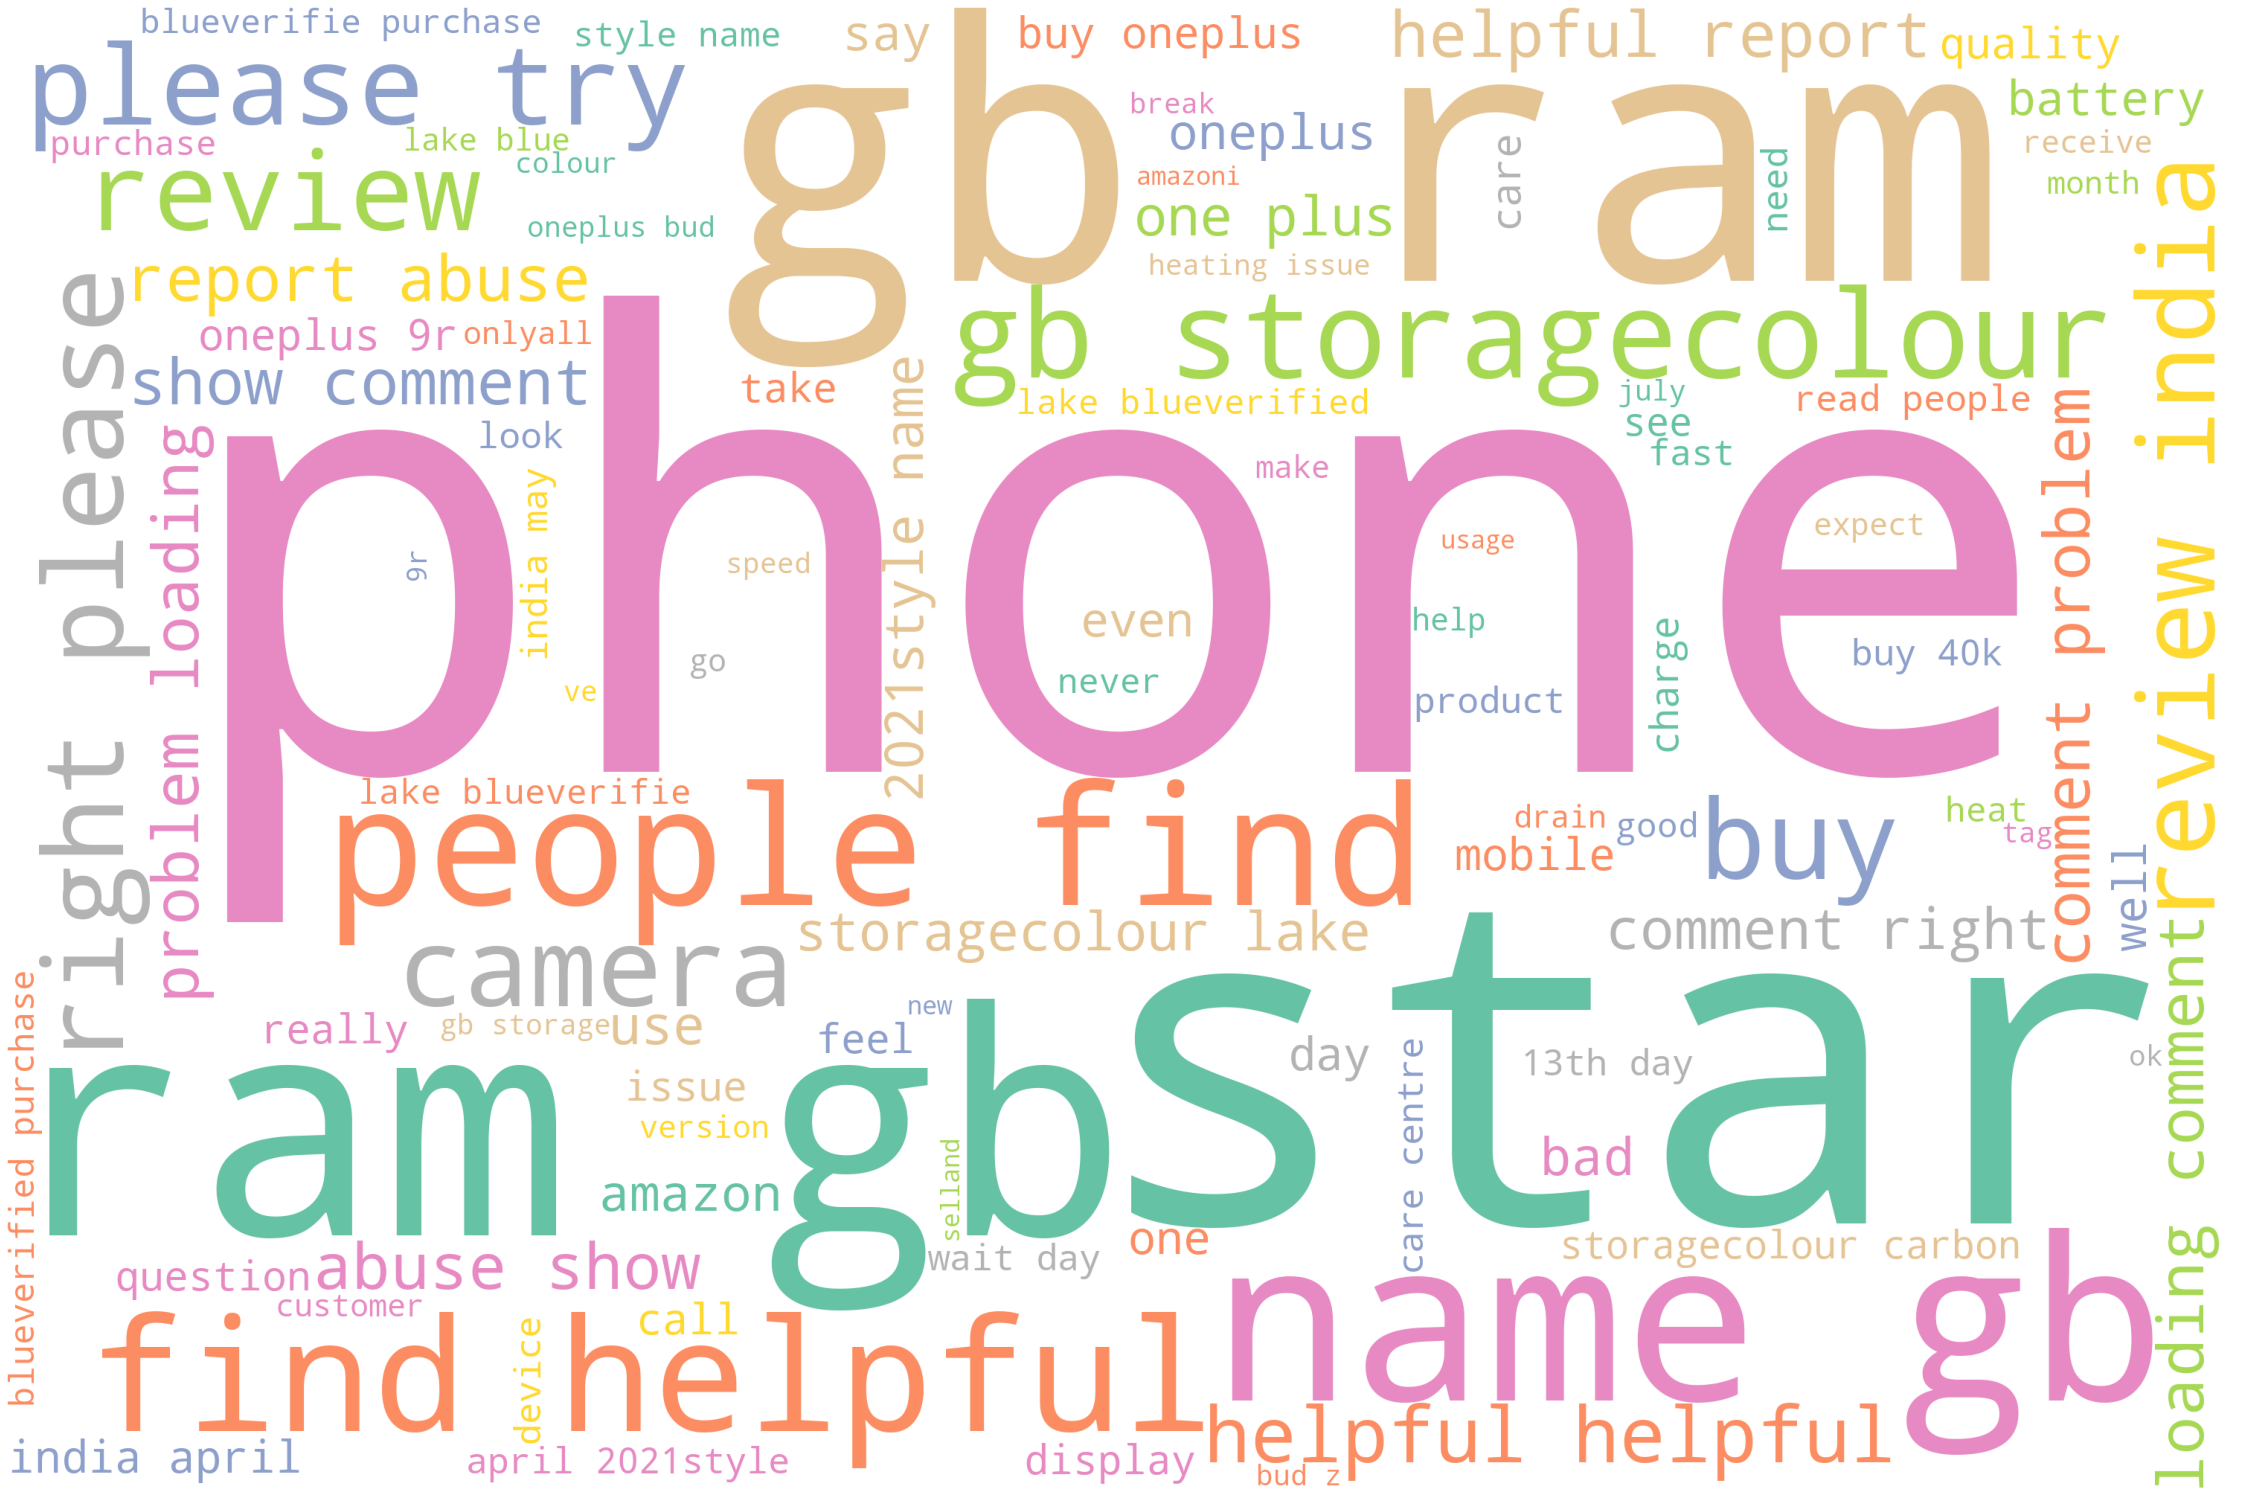

In [31]:
#Define a function to plot word cloud

def plot_cloud(wc):
    plt.figure(figsize=(40,30))
    plt.imshow(wc)
    plt.axis('off')
    
#Generate word cloud

word_cloud = WordCloud(width=3000, height=2000, background_color='white', max_words=100,
                      colormap='Set2', stopwords=STOPWORDS).generate(clean_reviews)
plot_cloud(word_cloud)

## Named Entity Recognition(NER)

In [32]:
#Parts of speech (POS) tagging

nlp = spacy.load('en_core_web_sm')
one_block =clean_reviews
doc_block = nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [33]:
for token in doc_block[100:200]:
    print(token,token.pos_)

min NOUN
go NOUN
say VERB
30 NUM
battery NOUN
100 NUM
battery NOUN
chargei PROPN
also ADV
buy VERB
oneplus PROPN
bud PROPN
z PROPN
along ADP
phone NOUN
great ADJ
quality NOUN
connect NOUN
bud NOUN
sometimes ADV
issue NOUN
sometimes ADV
connect VERB
automatically ADV
sometimes ADV
detectoverall NOUN
still ADV
love VERB
phone NOUN
though SCONJ
think VERB
bit NOUN
heavy ADJ
large ADJ
screen NOUN
nongamer NOUN
read VERB
1035 NUM
people NOUN
find VERB
helpful ADJ
top ADJ
critical ADJ
reviewall NOUN
critical ADJ
reviews› PROPN
ashannita10 PROPN
5 NUM
starsclaim NOUN
replacement NOUN
oneplus PROPN
9r PROPN
phonereviewe PROPN
india PROPN
30 NUM
may AUX
2021hiplease NOUN
consider VERB
message NOUN
serious ADJ
note VERB
one NUM
plus CCONJ
9r NUM
buy VERB
mention NOUN
date NOUN
got AUX
hang VERB
open ADJ
exactly ADV
13th ADJ
day NOUN
buy VERB
replacement NOUN
policy NOUN
10 NUM
day NOUN
phone NOUN
show NOUN
prblm NOUN
13th ADJ
day NOUN
take VERB
one NUM
plus CCONJ
care NOUN
centre NOUN
say VERB
n

In [34]:
#Filtering the noun and verbs only
nouns_verbs = [token.text for token in doc_block if token.pos_ in('NOUN','VERB')]
print(nouns_verbs[100:200])

['ask', 'replace', 'phone', 'care', 'replace', 'buy', 'amazon', 'suggest', 'replace', 'amazon', 'buy', '40k', 'phone', 'tag', 'oneplus', 'company', 'people', 'kind', 'phone', 'selland', 'want', 'claim', 'replacement', 'phone', 'amazoni', 'care', 'day', 'return', 'policy', 'want', 'say', 'buy', '40k', 'phone', 'guy', 'workbeen', 'wait', 'day', 'phone', 'hand', 'kind', 'service', 'provide', 'like', 'phone', 'replace', 'reply', 'read', 'people', 'find', 'sort', 'reviewsmost', 'recenttop', 'review', 'reviewall', 'mohit', 'starsamaze', 'flagshipreviewe', 'time', 'buy', 'oneplus', 'phone', 'finish', 'camera', 'excellent', 'use', 'function', 'day', 'usage', 'place', 'expand', 'memoryupdate', 'review', 'day', 'use', 'buy', 'update', 'review', 'charge', 'min', 'go', 'say', 'battery', 'battery', 'buy', 'phone', 'quality', 'connect', 'bud', 'issue', 'connect', 'detectoverall', 'love', 'phone', 'think', 'bit', 'screen', 'nongamer', 'read', 'people']


In [36]:
# Counting the noun and verb tokens
from sklearn.feature_extraction.text import CountVectorizer

cv=CountVectorizer()
x=cv.fit_transform(nouns_verbs)
sum_words = x.sum(axis=0)

words_freq = [(word, sum_words[0,idx]) for word, idx in cv.vocabulary_.items()]
words_freq = sorted(words_freq,key=lambda x:x[1], reverse=True)

wd_df = pd.DataFrame(words_freq)
wd_df.columns = ['word','count']
wd_df[0:10]

,word,count
0,phone,81
1,review,49
2,buy,45
3,comment,40
4,day,37
5,people,32
6,find,29
7,star,27
8,name,27
9,camera,26


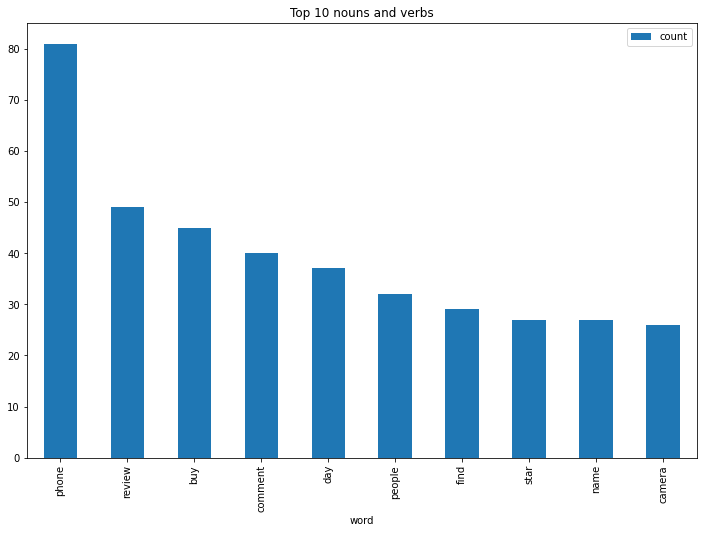

In [37]:
#Visualizing results
wd_df[0:10].plot.bar(x='word', figsize=(12,8), title = 'Top 10 nouns and verbs');

## Emotion Mining - Sentiment Analysis

In [39]:
from  nltk import tokenize

sentences = tokenize.sent_tokenize(' '.join(df))
sentences

['IMDbMovies, TV& Celebrities © 1996-2022, Amazon.com, Inc. or its affiliates 3.0 out of 5 stars 1.0 out of 5 stars Style name: 8GB RAM, 128GB StorageColour: Lake Blue Style name: 12GB RAM, 256GB StorageColour: Lake Blue Style name: 8GB RAM, 128GB StorageColour: Carbon Black Top positive reviewAll positive reviews› Mohit MJ5.0 out of 5 starsAmazing - True FlagshipReviewed in India on 19 April 2021My first time buying a OnePlus phone and I really like the finish of the one.',
 'Camera is excellent, Android 11 is very smooth to use, functions are fast.Just my first day of usage so hard to be critical of anything.',
 'The downside for me is that there is no place expand the memory.---Updating my review after 100 days of using.',
 'Bought on April 19th updated review on July 29th.Super fast charging.. 30 mins and goes from say 30% battery to 100% battery charge.I also bought the OnePlus Buds Z along with the phone and these are great quality.',
 'Connecting the buds sometimes is an issue.'

In [41]:
sent_df= pd.DataFrame(sentences, columns=['sentence'])
sent_df

,sentence
0,"IMDbMovies, TV& Celebrities © 1996-2022, Amazo..."
1,"Camera is excellent, Android 11 is very smooth..."
2,The downside for me is that there is no place ...
3,Bought on April 19th updated review on July 29...
4,Connecting the buds sometimes is an issue.
...,...
206,Get fast answers from reviewers\n \n\n\n\n\n\...
207,You can edit your question or post anyway.
208,Please enter a question.
209,See all 1000+ answered questions\n\n\n\nNeed c...


In [42]:
#Emotion Lexicon - Affin
affin= pd.read_csv('Afinn.csv',sep=',', encoding='Latin-1')
affin

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2
...,...,...
2472,yucky,-2
2473,yummy,3
2474,zealot,-2
2475,zealots,-2


In [43]:
affinity_scores = affin.set_index('word')['value'].to_dict()
affinity_scores

{'abandon': -2,
 'abandoned': -2,
 'abandons': -2,
 'abducted': -2,
 'abduction': -2,
 'abductions': -2,
 'abhor': -3,
 'abhorred': -3,
 'abhorrent': -3,
 'abhors': -3,
 'abilities': 2,
 'ability': 2,
 'aboard': 1,
 'absentee': -1,
 'absentees': -1,
 'absolve': 2,
 'absolved': 2,
 'absolves': 2,
 'absolving': 2,
 'absorbed': 1,
 'abuse': -3,
 'abused': -3,
 'abuses': -3,
 'abusive': -3,
 'accept': 1,
 'accepted': 1,
 'accepting': 1,
 'accepts': 1,
 'accident': -2,
 'accidental': -2,
 'accidentally': -2,
 'accidents': -2,
 'accomplish': 2,
 'accomplished': 2,
 'accomplishes': 2,
 'accusation': -2,
 'accusations': -2,
 'accuse': -2,
 'accused': -2,
 'accuses': -2,
 'accusing': -2,
 'ache': -2,
 'achievable': 1,
 'aching': -2,
 'acquit': 2,
 'acquits': 2,
 'acquitted': 2,
 'acquitting': 2,
 'acrimonious': -3,
 'active': 1,
 'adequate': 1,
 'admire': 3,
 'admired': 3,
 'admires': 3,
 'admiring': 3,
 'admit': -1,
 'admits': -1,
 'admitted': -1,
 'admonish': -2,
 'admonished': -2,
 'adopt': 

In [44]:
#Custom function:score each word in a sentence in lemmatization

nlp=spacy.load('en_core_web_sm')
sentiment_lexicon = affinity_scores

def calcu_senti(text:str=None):
    sent_score=0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score+= sentiment_lexicon.get(word.lemma_,0)
    return sent_score

In [45]:
#manual testing
calcu_senti(text='worst')

-3

In [46]:
#Calculating sentiment value for each sentence
sent_df['sentiment_value']= sent_df['sentence'].apply(calcu_senti)
sent_df

,sentence,sentiment_value
0,"IMDbMovies, TV& Celebrities © 1996-2022, Amazo...",6
1,"Camera is excellent, Android 11 is very smooth...",2
2,The downside for me is that there is no place ...,-2
3,Bought on April 19th updated review on July 29...,6
4,Connecting the buds sometimes is an issue.,0
...,...,...
206,Get fast answers from reviewers\n \n\n\n\n\n\...,1
207,You can edit your question or post anyway.,0
208,Please enter a question.,1
209,See all 1000+ answered questions\n\n\n\nNeed c...,0


In [48]:
#how many words are there in a sentence
sent_df['word_count']= sent_df['sentence'].str.split().apply(len)
sent_df

,sentence,sentiment_value,word_count
0,"IMDbMovies, TV& Celebrities © 1996-2022, Amazo...",6,79
1,"Camera is excellent, Android 11 is very smooth...",2,25
2,The downside for me is that there is no place ...,-2,20
3,Bought on April 19th updated review on July 29...,6,38
4,Connecting the buds sometimes is an issue.,0,7
...,...,...,...
206,Get fast answers from reviewers\n \n\n\n\n\n\...,1,15
207,You can edit your question or post anyway.,0,8
208,Please enter a question.,1,4
209,See all 1000+ answered questions\n\n\n\nNeed c...,0,8


In [49]:
sent_df.sort_values(by='sentiment_value')

,sentence,sentiment_value,word_count
183,Please try again later.Anil Kumar Devarapu1.0 ...,-8,35
50,Please try again later.Prasad1.0 out of 5 star...,-6,58
160,It sucks so bad.,-6,4
189,Please try again later.SHIVANI✔️1.0 out of 5 s...,-5,122
87,By Satyy on 19 April 2021\n ...,-5,100
...,...,...,...
112,Bought on April 19th updated review on July 29...,6,38
97,Bought on April 19th updated review on July 29...,6,38
0,"IMDbMovies, TV& Celebrities © 1996-2022, Amazo...",6,79
109,I really would like you to have my phone repla...,12,63


In [50]:
#Sentiment score of the whole review
sent_df['sentiment_value'].describe()

count    211.000000
mean       0.587678
std        2.623273
min       -8.000000
25%       -1.000000
50%        0.000000
75%        2.000000
max       12.000000
Name: sentiment_value, dtype: float64

In [51]:
#negative sentiment score of the whole review
sent_df[sent_df['sentiment_value']<=0]

,sentence,sentiment_value,word_count
2,The downside for me is that there is no place ...,-2,20
4,Connecting the buds sometimes is an issue.,0,7
7,The replacement policy was only for 10 days an...,-2,17
9,They are now suggesting to replace it through ...,0,10
10,Is this what i bought a 40k One Plus phone for?,0,11
...,...,...,...
201,120hz display drains your battery... so i have...,-2,23
203,"Coming to processor, it has sanpdragon 870 and...",-1,39
207,You can edit your question or post anyway.,0,8
209,See all 1000+ answered questions\n\n\n\nNeed c...,0,8


In [52]:
#Positive sentiment score of the whole review
sent_df[sent_df['sentiment_value']>0]

,sentence,sentiment_value,word_count
0,"IMDbMovies, TV& Celebrities © 1996-2022, Amazo...",6,79
1,"Camera is excellent, Android 11 is very smooth...",2,25
3,Bought on April 19th updated review on July 29...,6,38
5,Sometimes it will connect automatically and so...,3,28
6,"Read more\n\n 1,035 people found this...",4,62
...,...,...,...
202,Camera is pretty ordinary stuff... the same yo...,1,16
204,"If you want to help their cause, you can go an...",2,33
205,Please try again later.←Previous pageNext page...,1,7
206,Get fast answers from reviewers\n \n\n\n\n\n\...,1,15


In [53]:
#Adding index column

sent_df['index']= range(0,len(sent_df))
sent_df

,sentence,sentiment_value,word_count,index
0,"IMDbMovies, TV& Celebrities © 1996-2022, Amazo...",6,79,0
1,"Camera is excellent, Android 11 is very smooth...",2,25,1
2,The downside for me is that there is no place ...,-2,20,2
3,Bought on April 19th updated review on July 29...,6,38,3
4,Connecting the buds sometimes is an issue.,0,7,4
...,...,...,...,...
206,Get fast answers from reviewers\n \n\n\n\n\n\...,1,15,206
207,You can edit your question or post anyway.,0,8,207
208,Please enter a question.,1,4,208
209,See all 1000+ answered questions\n\n\n\nNeed c...,0,8,209


<Figure size 1080x720 with 0 Axes>

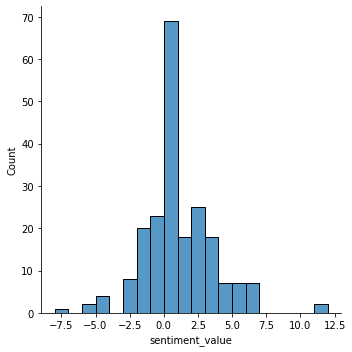

In [54]:
#plotting the sentiment value for the whole review
import seaborn as sns
plt.figure(figsize=(15,10))
sns.displot(sent_df['sentiment_value'])

In [ ]:
#ploting the line plot for the sentiment value of the whole review

plt.figure(figsize=(15,10))
sns.lineplot(y='sentiment_val')